# Procesamiento inicial de datos – Grupo 5

Este notebook realiza el primer paso del análisis:

- Revisa si ya existen los archivos procesados (`.csv`) con los datos limpios.
- Si no existen, los genera a partir de las bases originales de la EPH (`.xlsx`).
- Guarda dos versiones:
  - **Base completa**: todos los registros de personas + hogares (sin filtrar).
  - **Base filtrada**: solo personas de la región pampeana, mayores de 18 y con ingreso declarado.

Luego muestra los primer 5 registros de cada base para entender cómo están estructuradas y validar que se hayan generado correctamente.


In [2]:
import os
import pandas as pd
import numpy as np
from pipeline_simple import construir_base_limpia

# Archivos de entrada/salida
PERSONAS = "usu_individual_T324.xlsx"
HOGARES = "usu_hogar_T324.xlsx"
CSV_COMPLETO = "base_completa_personas_hogares.csv"
CSV_FILTRADO = "base_pampeana_analizada.csv"

# Ejecutar pipeline si los archivos no existen
if os.path.exists(CSV_COMPLETO) and os.path.exists(CSV_FILTRADO):
    print("✅ CSVs encontrados. Cargando datos procesados...")
    df_completo = pd.read_csv(CSV_COMPLETO)
    df_filtrado = pd.read_csv(CSV_FILTRADO)
else:
    print("CSVs no encontrados. Ejecutando pipeline de procesamiento...")
    df_completo, df_filtrado = construir_base_limpia(PERSONAS, HOGARES,
                                                      out_csv_completo=CSV_COMPLETO,
                                                      out_csv_filtrado=CSV_FILTRADO)

✅ CSVs encontrados. Cargando datos procesados...


In [2]:
# Mostramos 5 registros aleatorios de la base completa
# Esta base incluye a todas las personas y hogares, útil para análisis generales.

print("Muestra de la base completa (sin filtrar):")
display(df_completo.sample(5))

Muestra de la base completa (sin filtrar):


,id_vivienda,id_hogar,region,sexo,fecha_nacimiento,edad,estado_actividad,nivel_educativo,ingreso,prestamo_personas,prestamo_banco,compra_cuotas
7840,TQRMNOPVPHJOLRCDEIIAD00862199,1,1,2,1953-04-23 00:00:00,71,3,6,375000.0,2,2,2
8627,TQRMNOPSXHKLKSCDEGNFJ00868297,1,44,2,2005-04-12 00:00:00,19,3,5,0.0,2,2,1
3016,TQRMNOSTYHJKKMCDEGIBJ00868560,1,41,1,1900-01-01 00:00:00,71,1,5,-9.0,2,2,2
8855,TQRMNOTPUHKOLQCDEHJGH00867225,1,40,1,1994-01-04 00:00:00,30,1,3,600000.0,2,1,2
46857,TQRMNOPYRHLMKTCDEGGFB00804657,1,42,2,2005-08-20 00:00:00,19,3,4,0.0,2,2,1


In [3]:
# Mostramos 5 registros aleatorios de la base filtrada
# Esta es la base que usamos para los análisis del informe: región pampeana, mayores de 18 y con ingreso.

print("Muestra de la base filtrada (región Pampeana, mayores de 18 con ingreso):")
display(df_filtrado.sample(5))

Muestra de la base filtrada (región Pampeana, mayores de 18 con ingreso):


,id_vivienda,id_hogar,region,sexo,fecha_nacimiento,edad,estado_actividad,nivel_educativo,ingreso,prestamo_personas,prestamo_banco,compra_cuotas
6169,TQRMNORTPHJOKQCDEFLID00865372,1,43,1,1983-12-11 00:00:00,40,1,3,160000.0,2,2,1
4016,TQRMNORSUHKMLOCDEIMBF00869644,1,43,2,1985-05-09 00:00:00,39,3,1,274000.0,2,2,2
2818,TQRMNOQVPHKMLPCDEGJBF00870533,1,43,1,1993-05-21 00:00:00,31,1,6,600000.0,2,2,2
1959,TQRMNOQXSHJMKRCDEGJBF00861917,1,43,1,2001-07-29 00:00:00,23,1,5,200000.0,2,1,1
5978,TQRMNOQUPHLOMNCDEFKID00803666,1,43,2,1900-01-01 00:00:00,46,1,6,720000.0,2,2,1


## Unidad 4 - Probabilidad


---

## ¿Las personas con mayor educación tienen más chances de estar ocupadas?

$P(A|B) = \frac {P(A∩B)}{P(B)}$

### Queremos responder:

**¿Cuál es la probabilidad de que una persona esté ocupada, sabiendo que tiene educación universitaria completa?**

Traducimos a símbolos:

A = persona ocupada

B = persona con educación universitaria completa

Entonces:

$P(Ocupado|Universitario) = \frac {P(Ocupado ∩ Universitario)}{P(Universitario)}$


- Si P(Ocupado | Universitario) > P(Ocupado) significa que tener educación superior aumenta las chances de estar ocupado.

- Si son iguales, entonces no hay diferencia (educación no parece influir en ocupación).

- Si es menor, entonces tener título no se asocia a mejor ocupación.

Esto no prueba causalidad, pero sí señala una asociación estadística importante.

### Calculamos:

- P(Ocupado): proporción general de personas ocupadas.

- P(Ocupado | Universitario): proporción de ocupados entre quienes tienen título universitario completo.

Luego comparamos y sacamos conclusiones.

In [4]:
# Creamos una serie booleana que indica si cada persona tiene educación universitaria completa
universitario = df_filtrado['nivel_educativo'] == 6

# Otra serie booleana que indica si la persona está ocupada
ocupado = df_filtrado['estado_actividad'] == 1

# Probabilidad condicional: P(ocupado | universitario)
# Contamos cuántas personas cumplen ambas condiciones (ocupado y universitario)
# y lo dividimos por el total de universitarios
p_ocupado_dado_universitario = (ocupado & universitario).sum() / universitario.sum()

# Probabilidad general: P(ocupado)
# Calculamos cuántas personas están ocupadas sobre el total de personas
p_ocupado_general = ocupado.mean()

# Mostramos los resultados redondeados
print("P(Ocupado) =", round(p_ocupado_general, 3))
print("P(Ocupado | Universitario) =", round(p_ocupado_dado_universitario, 3))

#Mostramos las cantidades
print("Cantidad de ocupados: ", ocupado.sum())
print("Cant. Universitarios:", universitario.sum())



P(Ocupado) = 0.636
P(Ocupado | Universitario) = 0.78
Cantidad de ocupados:  4477
Cant. Universitarios: 1411


## Conclusión

P(Ocupado) = 63.6 %

P(Ocupado | Universitario) = 78 %

Tal como era esperable, los universitarios tienen una mayor tasa de ocupación que las personas con un nivel educativo menor.

---
## ¿Existe relación entre bajo nivel educativo y necesidad de financiarse en cuotas?

Queremos responder:
¿Cuál es la probabilidad de que una persona compre en cuotas, sabiendo que tiene un nivel educativo bajo?

Traducimos a símbolos:

A = persona compra en cuotas

B = persona con nivel educativo bajo

### Entonces:

$P(Cuotas∣Nivel bajo) = \frac {P(Cuotas ∩ Nivel bajo)}{P(Nivel bajo)}$

- Si P(Cuotas | Nivel bajo) > P(Cuotas) significa que las personas con menos educación compran en cuotas con mayor frecuencia.

- Si son iguales, no hay relación aparente.

- Si es menor, entonces tener menor nivel educativo no se asocia a mayor necesidad de financiarse.


### Calculamos:

P(Cuotas): proporción general de personas que compran en cuotas.

P(Cuotas | Nivel bajo): proporción de personas con nivel educativo bajo que compran en cuotas.

Luego comparamos y sacamos conclusiones.

In [5]:
# Definimos quiénes tienen bajo nivel educativo (primario completo o menos)
nivel_bajo = df_filtrado['nivel_educativo'] < 5

# Definimos quiénes compran en cuotas (según variable codificada como 1 = Sí)
cuotas = df_filtrado['compra_cuotas'] == 1

# Probabilidad condicional: P(cuotas | nivel educativo bajo)
p_cuotas_dado_bajo = (nivel_bajo & cuotas).sum() / nivel_bajo.sum()

# Probabilidad general: P(cuotas)
p_cuotas_general = cuotas.mean()

# Mostramos los resultados
print("P(Compra en cuotas) =", round(p_cuotas_general, 3))
print("P(Compra en cuotas | Nivel educativo bajo) =", round(p_cuotas_dado_bajo, 3))

# Mostramos cantidades
print("Cantidad que compra en cuotas:", cuotas.sum())
print("Cantidad con nivel educativo bajo:", nivel_bajo.sum())


P(Compra en cuotas) = 0.497
P(Compra en cuotas | Nivel educativo bajo) = 0.446
Cantidad que compra en cuotas: 3504
Cantidad con nivel educativo bajo: 4602


### Conclusión

P(Compra en cuotas) = 49.7 %

P(Compra en cuotas | Nivel educativo bajo) = 44.6 %

Cantidad que compra en cuotas: 3,504 personas

Cantidad con nivel educativo bajo: 4,602 personas

Aunque podría esperarse que las personas con menor nivel educativo utilicen con mayor frecuencia mecanismos de financiamiento como la compra en cuotas, los datos muestran lo contrario: la proporción de personas con bajo nivel educativo que compra en cuotas es menor que la proporción general.

Este resultado sugiere que el nivel educativo bajo no se asocia a un mayor uso del financiamiento. Incluso podría reflejar restricciones de acceso al crédito o menor consumo formal entre los sectores con menor nivel educativo. Para interpretarlo correctamente, sería necesario considerar también el ingreso, el acceso a bienes durables y otras condiciones económicas.

---
## Verificar si la distribución de log(ingreso) se ajusta bien a una distribución normal.

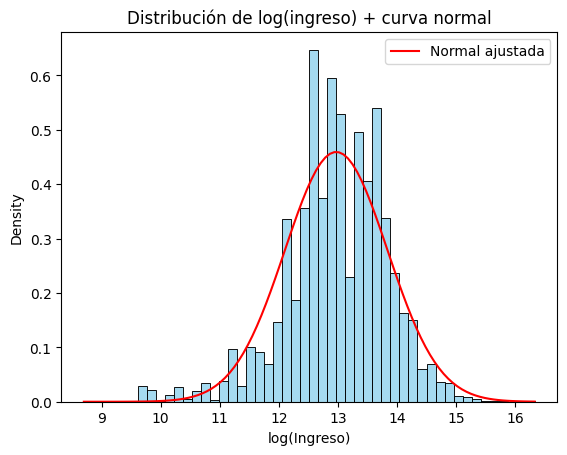

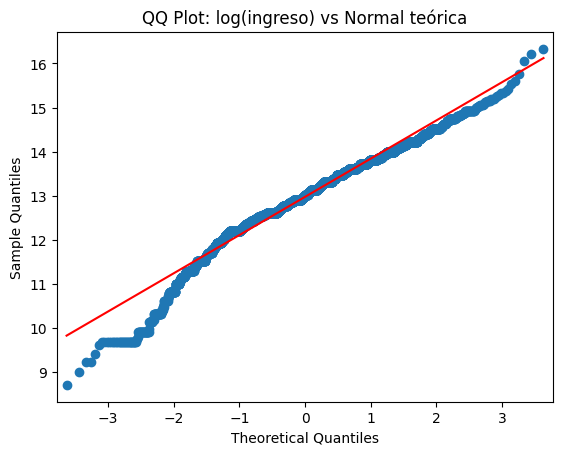

KS-statistic: 0.0631
p-valor: 0.0


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

# Aseguramos que log_ingreso esté calculado
df_filtrado['log_ingreso'] = np.log(df_filtrado['ingreso'])

# Ajustamos una distribución normal
mu, sigma = stats.norm.fit(df_filtrado['log_ingreso'])

# 1. Histograma + curva normal ajustada
sns.histplot(df_filtrado['log_ingreso'], bins=50, kde=False, stat='density', color='skyblue')
x = np.linspace(df_filtrado['log_ingreso'].min(), df_filtrado['log_ingreso'].max(), 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma), color='red', label='Normal ajustada')
plt.title("Distribución de log(ingreso) + curva normal")
plt.xlabel("log(Ingreso)")
plt.legend()
plt.show()

# 2. QQ plot
import statsmodels.api as sm
sm.qqplot(df_filtrado['log_ingreso'], line='s')
plt.title("QQ Plot: log(ingreso) vs Normal teórica")
plt.show()

# 3. Test de Kolmogorov–Smirnov
ks_stat, p_valor = stats.kstest(df_filtrado['log_ingreso'], 'norm', args=(mu, sigma))
print("KS-statistic:", round(ks_stat, 4))
print("p-valor:", round(p_valor, 4))


## Conclusión

La variable log_ingreso muestra una distribución cercana a la normal, como se observa en el histograma con la curva normal ajustada. Esto permite utilizar modelos y estimaciones basadas en esta distribución, facilitando el análisis de probabilidades e ingresos extremos. A pesar de pequeñas desviaciones en las colas, el comportamiento general es consistente con la hipótesis de normalidad.

El QQ plot muestra que la variable log_ingreso se ajusta bastante bien a una distribución normal, especialmente en el rango central de los datos. Si bien hay pequeñas desviaciones en las colas, el comportamiento general respalda el uso de la normal para modelar log_ingreso.

